# Repaso Módulo 1 - Optimización.
---

## Primer punto. Optimización de funciones escalares usando `sympy`.

**Enunciado.** Calcular **las dimensiones** del rectángulo de área máxima que puede inscribirse dentro de un semicírculo de radio 2.

Note que **las dimensiones** son base $b = 2x$ y altura $h = y$. Ver la siguiente figura.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

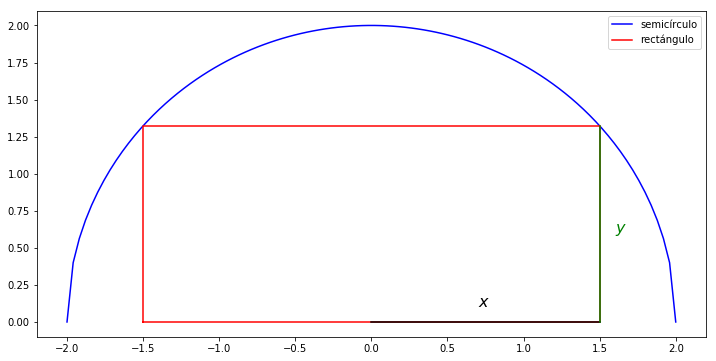

In [2]:
x = np.linspace(-2, 2, 100)
y = np.sqrt(4 - x**2)

xr = [-1.5, -1.5, 1.5, 1.5, -1.5]
yr = [0, np.sqrt(4 - 1.5**2), np.sqrt(4 - 1.5**2), 0, 0]

xx = [0, 1.5]
yx = [0, 0]

xy = [1.5, 1.5]
yy = [0, np.sqrt(4 - 1.5**2)]

plt.figure(figsize = (12, 6))
plt.plot(x, y, 'b', label = 'semicírculo')
plt.plot(xr, yr, 'r', label = 'rectángulo')
plt.plot(xx, yx, 'k')
plt.plot(xy, yy, 'g')
plt.text(0.7, 0.1, '$x$', fontsize = 16)
plt.text(1.6, 0.6, '$y$', fontsize = 16, color = 'g')
plt.legend(loc = 'best')
plt.show()

**Punto 1.** Encuentre el área del rectángulo en función de la variable $x$, $A_R(x)$. También provea el dominio de la función para que tenga sentido.

Realice este punto usando fórmulas en $\LaTeX$, en celdas Markdown.

---
**Solución:**

Se desea maximizar el área del rectángulo inscrito en el semicírculo de radio 2 $A_R(x)$.

Entonces, el área del rectángulo es base por altura $A_R(x)=bh$, donde la base es $b=2x$ y la altura es $h=y$.

Además, se sabe que formando un triángulo rectángulo, se puede escribir $2^2=x^2+y^2$. Despejando $y$, se tiene $y=\sqrt{4-x^2}$, sustituyendo esto último en el área, resulta
$$
A_R(x)=2x\sqrt{4-x^2},
$$
donde $x\leq2$ para que el área no tome valores complejos y $x$ positivo para que el área no sea negativa.

**Punto 2.** Usando `sympy` maximice la función $A_R(x)$ en su dominio.

In [1]:
# Importar librerías
#
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [2]:
# Definir la variable simbólica y la función objetivo
#
sym.var('x',real=True) # La variable simbólica 'x' solo puede tomar valores reales
def AR(x):
    return 2*x*(4-x**2)**0.5
AR(x)

2*x*(4 - x**2)**0.5

In [3]:
# Encontramos el punto crítico
#
dA=sym.diff(AR(x),x) # Derivamos
c=sym.solve(dA,x) # Encontrar las raíces de la derivada
c

[-1.41421356237310, 1.41421356237310]

In [4]:
# Para usar el valor dentro del rango de 'x'. Le pedimos la posición 1 de 'c'
c[1]

1.41421356237310

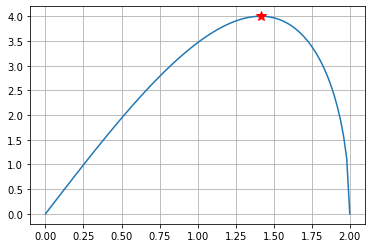

In [5]:
# Gráfica
#
xn=np.linspace(0,2,100) # Definimos 'xn' como la variable nnumérica en el rango permicible
yn=AR(xn)
plt.plot(xn,yn)
plt.plot(c[1],AR(c[1]),'*r',ms=10)
plt.grid()

In [6]:
AR(c[1])

4.00000000000000

**Punto 3.** ¿Cuáles son las dimensiones $b$ y $h$ del rectángulo resultante?

In [7]:
# Base
2*c[1] # c[1] -> es el valor óptimo de 'x'

2.82842712474619

In [9]:
# Altura
(4-c[1]**2)**0.5 # Encontrando el valor de 'y'

1.41421356237309

El área máxima del rectángulo es $4.0$ con una base de $b=2.8284$ y una altura de $h=1.4142$.

---

## Segundo punto. Programación lineal.

**Enunciado.** Considere un restaurante que abre los siete días de la semana. Con base en la experiencia, el mínimo número de trabajadores necesarios en cada día de la semana es:

In [10]:
import pandas as pd

In [4]:
df = pd.DataFrame(columns=['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'], index = ['Num_trabajadores'])
df.loc['Num_trabajadores', :] = [14, 13, 15, 16, 19, 18, 11]
df

,Lunes,Martes,Miercoles,Jueves,Viernes,Sábado,Domingo
Num_trabajadores,14,13,15,16,19,18,11


Cada trabajador labora cinco días consecutivos, y luego descansa dos, repitiendo este patrón indefinidamente. Se debe minimizar la cantidad de trabajadores totales en el restaurante.

*Definición de variables*: enumeramos los días del uno al siete (Lunes - 1, Martes - 2, ..., Domingo - 7). Sea $x_i$ el número de trabajadores que empieza su turno de cinco días el día $i$.

**Punto 1.** Escriba la función a minimizar junto con las restricciones, explicando detalladamente cada paso (usando fórmulas en $\LaTeX$, en celdas Markdown). Además escriba el problema en la forma 
\begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}
\end{equation}

proporcionando $\boldsymbol{c}$, $\boldsymbol{A}$ y $\boldsymbol{b}$ ($\boldsymbol{A}_{eq}$ y $\boldsymbol{b}_{eq}$, de ser necesario) como arreglos de `NumPy` (no es necesario escribir en $\LaTeX$ el problema en la forma indicada, solo proporcionar las matrices como arreglos de `NumPy`).

---
**Solución:**

Se desea minimizar el total de trabajadores, es decir, $x_1+x_2+x_3+\dots+x_7$, donde $x_i$ es el número de trabajadores que inicia el día $i$.

Sabiendo que cada trabajador labora cinco días seguidos, los trabajadores que inician laborando el lunes, continúan trabajando hasta el viernes acumulandose con los trabajadores que inician el martes, miércoles, jueves y viernes, los cuales deben satisfacer la demanda de trabajadores mínimos para el viernes. Esto es
$$
x_1+x_2+x_3+x_4+x_5\geq19\quad(Viernes),
$$
siguiendo esta lógica para el resto de la semana, se tiene
\begin{eqnarray}
x_2+x_3+x_4+x_5+x_6&\geq&18&(Sábado)\\
x_3+x_4+x_5+x_6+x_7&\geq&11&(Domingo)\\
x_4+x_5+x_6+x_7+x_1&\geq&14&(Lunes)\\
x_5+x_6+x_7+x_1+x_2&\geq&13&(Martes)\\
x_6+x_7+x_1+x_2+x_3&\geq&15&(Miércoles)\\
x_7+x_1+x_2+x_3+x_4&\geq&16&(Jueves)
\end{eqnarray}

In [10]:
c=np.array([1,1,1,1,1,1,1])
A=-np.array([[1,1,1,1,1,0,0],
             [0,1,1,1,1,1,0],
             [0,0,1,1,1,1,1],
             [1,0,0,1,1,1,1],
             [1,1,0,0,1,1,1],
             [1,1,1,0,0,1,1],
             [1,1,1,1,0,0,1]])
b=-np.array([19,18,11,14,13,15,16])

**Punto 2.** Resuelva el problema utilizando la función `linprog`. ¿Cuántos trabajadores son necesarios en total?

In [11]:
import scipy.optimize as opt

In [13]:
opt.linprog(c,A,b,method='simplex')

     con: array([], dtype=float64)
     fun: 22.0
 message: 'Optimization terminated successfully.'
     nit: 7
   slack: array([0., 0., 4., 0., 0., 0., 0.])
  status: 0
 success: True
       x: array([4., 3., 5., 4., 3., 3., 0.])

**Respuesta:**

Se necesitan 22 trabajadores en total, donde 4 de ellos inician laborando en lunes, 3 en martes, 5 en miércoles, 4 en jueves, 3 en viernes y los tres restantes en sábado.

## Tercer punto. Ajuste de curvas.

**Enunciado**. El archivo `Salarios_minimos.csv` contiene datos simplificados de los salarios mínimos desde 1986 a la fecha. La primer columna corresponde a los años, la segunda a dichos salarios. La información completa se encuentra en

https://idconline.mx/laboral/salarios-minimos/salarios-minimos-1986-2007.

**Punto 1.** Importar los datos en un DataFrame de pandas.

In [14]:
import pandas as pd

In [15]:
data=pd.read_csv('Salarios_minimos.csv')
data.head()

,Periodo,Salario
0,1988.25,8.00
1,1989.00,8.64
2,1989.50,9.16
3,1990.00,10.08
4,1990.84,11.90


**Punto 2.** Usando los años como variable independiente $x$ y los salarios mínimos como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

Mostrar en un solo gráfico los datos del archivo contra los años, y los polinomios ajustados.

Graficar el error cuadrático acumulado contra el número de términos. ¿Cuál es el polinomio que mejor se ajusta?

In [17]:
.25**2

0.0625

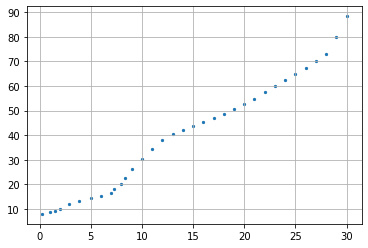

In [18]:
x=data['Periodo']-1988
y=data['Salario']
plt.scatter(x,y,s=5)
plt.grid()

In [19]:
# Definimos la función del polinomio
def f(beta,x,n):
    X=[x**i for i in range(n+1)] # [x**0, x**1, ..., x**n]
    return np.dot(beta,X)

# Definimos el criterio de optimización (Mínimos cuadrados)
def fun(beta,x,y,n):
    return np.sum((y-f(beta,x,n))**2)

In [20]:
sol=[0,0,0] # Inicializamos 'sol'
for i in range(3):
    beta0=np.random.rand(i+2)
    sol[i]=opt.minimize(fun,beta0,args=(x,y,i+1))

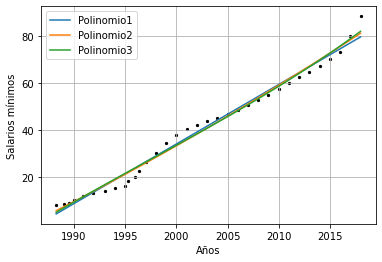

In [21]:
for i in range(3):
    plt.plot(x+1988,f(sol[i].x,x,i+1),label='Polinomio'+str(i+1))
plt.scatter(x+1988,y,s=5,c='k')
plt.legend(loc='best')
plt.xlabel('Años')
plt.ylabel('Salarios mínimos')
plt.grid()

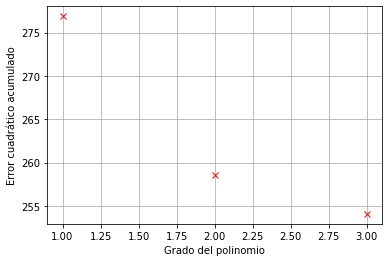

In [22]:
for i in range(3):
    plt.plot(i+1,sol[i].fun,'xr')
plt.xlabel('Grado del polinomio')
plt.ylabel('Error cuadrático acumulado')
plt.grid()

In [23]:
for i in range(3):
    print(sol[i].x)

[3.71557817 2.52832882]
[5.16416895 2.21902907 0.01042461]
[ 4.38105169e+00  2.55802802e+00 -1.86352090e-02  6.51692299e-04]


**Respuesta:**

Una solución más nivelada corresponde al polinomio de grado 1.

El polinomio de grado 3 es el que presenta menor error cuadrático acumulado.

**Punto 3.** Con los polinomios ajustados en el punto anterior, estime el salario mínimo en el año 2019 y compare con el dato real 102.68.

¿Cuál polinomio estima mejor este dato? ¿Es el polinomio que mejor se ajusta? Concluya.

In [24]:
a=2019-1988
for i in range(3):
    print(f(sol[i].x,a,i+1))

82.09377166073338
83.97212193559251
85.18604978442465


El polinomio que más se acerca al dato real es el de grado 3 a diferencia del propuesto en el primer punto como polinomio de grado uno. En realidad el modelo usado se ajusta a una linea recta en lugar de una exponencial que sería lo esperado según los datos reales.